In [38]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [49]:
damnet = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov7\NIDsMappedInBasins_MedRes_110724.csv")

C:\Users\ahurst\AppData\Local\Temp\1\ipykernel_16788\2055014741.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  damnet = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov7\NIDsMappedInBasins_MedRes_110724.csv")


In [10]:
#Test if different flags are present in the dataset by changing 'val' to the flag you want to search for.

val = 7

# Replace spaces with commas and then convert strings to lists or handle single integers
def convert_to_list(val):
    # If the value is a string representing a list, replace spaces with commas and eval it
    if isinstance(val, str):
        val = val.replace(' ', ',')  # Ensure valid list format
        return eval(val)
    # If the value is not iterable (e.g., an int), return it as a single-item list
    elif isinstance(val, int):
        return [val]
    else:
        return val

# Apply the conversion function to the 'flag' column
damnet['flag'] = damnet['flag'].apply(convert_to_list)

# Now check if any row contains the value 6
contains_six = damnet['flag'].apply(lambda x: val in x).any()

print(contains_six)  # Will print True if 6 is found, otherwise False

False


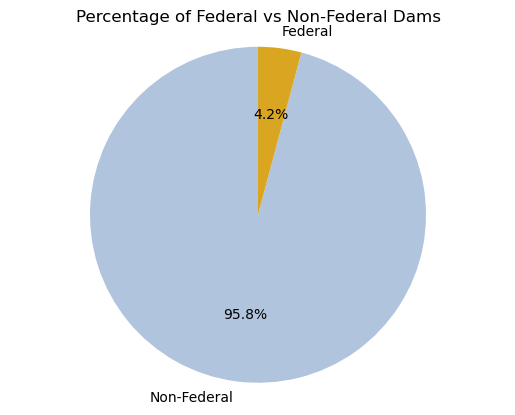

Federal
0    2.655401e+11
1    1.021151e+12
Name: MaxStor_m3, dtype: float64


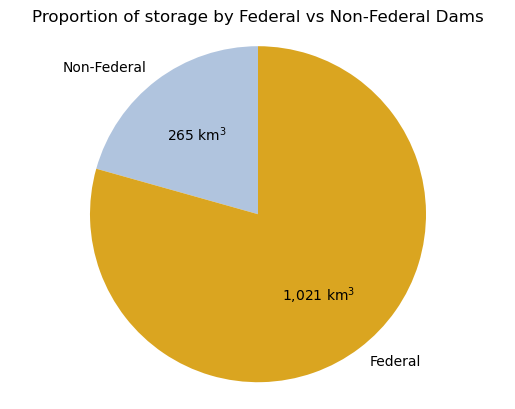

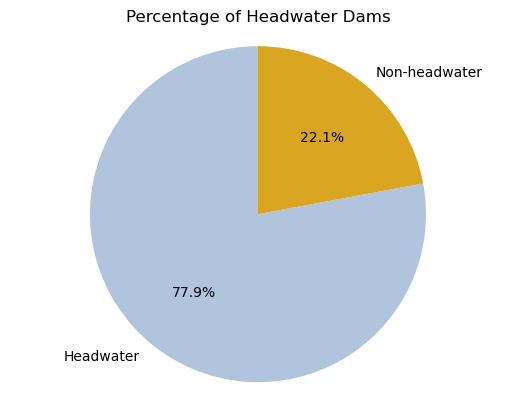

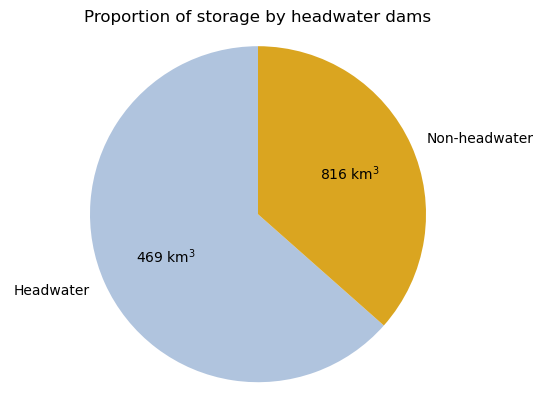

[  1 351 792 361 360 380 144]
[  279 13696 29868  9051  1792   341    38]


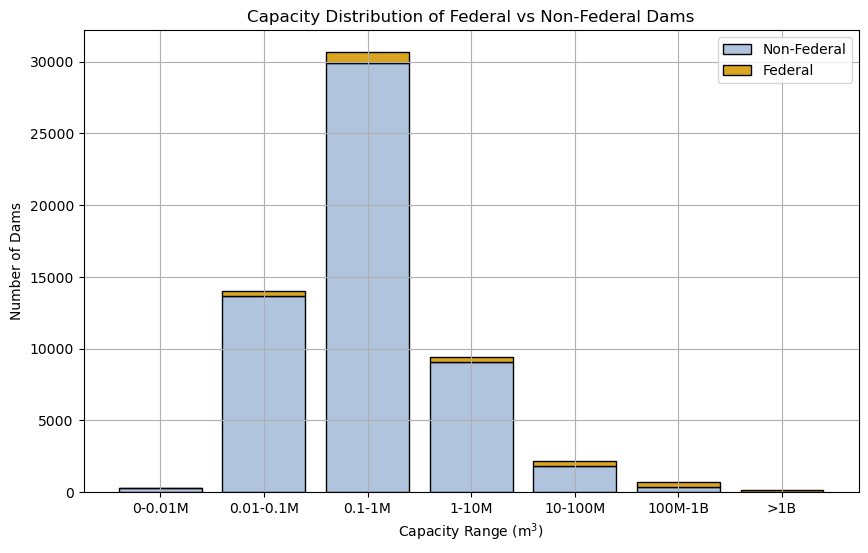

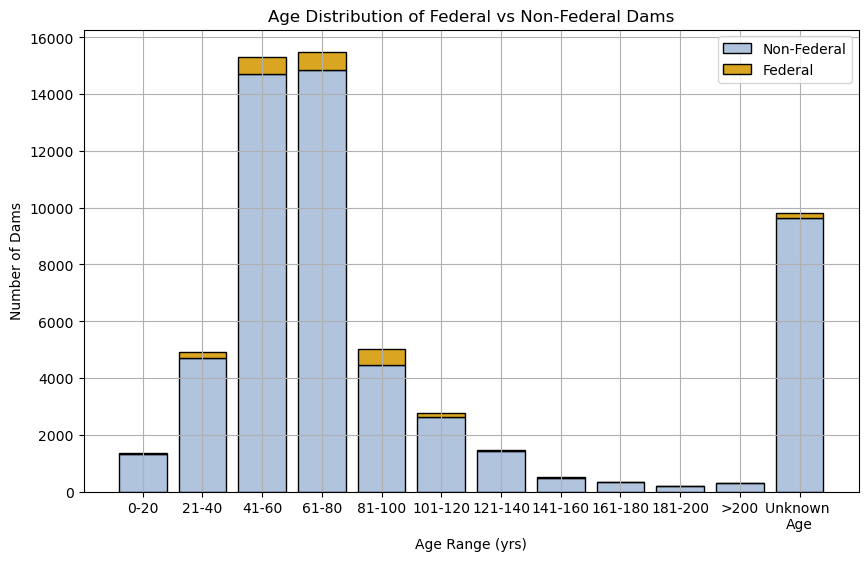

In [42]:
#Pie chart federal vs non federal
# Create a 'Federal' column: 1 if either IsUSBR or IsUSACE is 1, else 0
damnet['Federal'] = ((damnet['IsUSBR'] == 1) | (damnet['IsUSACE'] == 1) | (damnet['OwnerTypes']=='Federal')).astype(int)

# Count federal vs non-federal
federal_count = damnet['Federal'].value_counts()

# Plot pie chart
labels = ['Non-Federal', 'Federal']
plt.pie(federal_count, labels=labels, autopct='%1.1f%%', startangle=90,colors=['lightsteelblue','goldenrod'])
plt.title('Percentage of Federal vs Non-Federal Dams')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.


damnet['Age'] = 2024-damnet['yrc']
federal_dams = damnet[damnet['Federal']==1]
nonfederal_dams = damnet[damnet['Federal']==0]

# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\percentFed.png",bbox_inches='tight')
plt.show()


def custom_autopct(storage_sums):
    def inner_autopct(pct):
        total_storage = int(storage_sums[int(pct/100 * len(storage_sums))]*1e-9)  # Convert percentage to actual sum
        return f'{total_storage:,.0f} km$^3$'
    return inner_autopct

# Calculate the sum of MaxStor_m3 for federal and non-federal dams
storage_sums = damnet.groupby('Federal')['MaxStor_m3'].sum()
print(storage_sums)

# Create a label for each group
labels = ['Non-Federal', 'Federal']

# Plot pie chart based on the sum of storage
plt.pie(storage_sums, labels=labels, autopct = custom_autopct(storage_sums),startangle = 90, colors = ['lightsteelblue','goldenrod'])
plt.title('Proportion of storage by Federal vs Non-Federal Dams')
plt.axis('equal')

# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\FedPieCap.png",bbox_inches='tight')

plt.show()

#HW vs not
damnet['IsHW'] = (damnet['flagHW']==9).astype(int)
hw_count = damnet['IsHW'].value_counts()

labels = ['Headwater','Non-headwater']
plt.pie(hw_count,labels=labels,autopct='%1.1f%%',startangle=90,colors=['lightsteelblue','goldenrod'])
plt.title('Percentage of Headwater Dams')
plt.axis('equal')


# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\percentHW.png",bbox_inches='tight')
plt.show()

# Calculate the sum of MaxStor_m3 for federal and non-federal dams
storage_sums = damnet.groupby('IsHW')['MaxStor_m3'].sum()
# Plot pie chart based on the sum of storage
plt.pie(storage_sums, labels=labels, autopct = custom_autopct(storage_sums),startangle = 90, colors = ['lightsteelblue','goldenrod'])
plt.title('Proportion of storage by headwater dams')
plt.axis('equal')

# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\HWPieCap.png",bbox_inches='tight')

plt.show()

#capacity federal vs non-federal
bins = [0, 0.01e6,0.1e6, 1e6, 0.01e9,0.1e9, 1e9, np.inf]  # Adjust as per your real dataset range
labels = ['0-0.01M', '0.01-0.1M', '0.1-1M', '1-10M', '10-100M', '100M-1B', '>1B']

# Create histograms for federal and non-federal dams, including the special bin for large capacities
federal_hist, _ = np.histogram(federal_dams['MaxStor_m3'], bins=bins)
non_federal_hist, _ = np.histogram(nonfederal_dams['MaxStor_m3'], bins=bins)

print(federal_hist)
print(non_federal_hist)

# Create bar positions
x = np.arange(len(labels))  # label locations
# x = np.arange(len(bins)-1)
# Plot stacked bar chart with federal on top
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, non_federal_hist, label='Non-Federal',edgecolor='black', color='lightsteelblue')
ax.bar(x, federal_hist, bottom=non_federal_hist, label='Federal',edgecolor='black', color='goldenrod')

# Add labels, title, and legend
ax.set_xlabel('Capacity Range (m$^3$)')
ax.set_ylabel('Number of Dams')
ax.set_title('Capacity Distribution of Federal vs Non-Federal Dams')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.grid(True)


# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\CapFedvsNot.png",bbox_inches='tight')

plt.show()

# Separate unknown age dams (where 'yrc' is 0)
federal_unknown = federal_dams[federal_dams['yrc'] == 0]
nonfederal_unknown = nonfederal_dams[nonfederal_dams['yrc'] == 0]

#age federal vs non-federal
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,np.inf]
labels = ['0-20','21-40','41-60','61-80','81-100','101-120','121-140','141-160','161-180','181-200','>200']
federal_hist,_=np.histogram(federal_dams['Age'][federal_dams['yrc']!=0],bins=bins)
nonfederal_hist,_=np.histogram(nonfederal_dams['Age'][nonfederal_dams['yrc']!=0],bins=bins)

# Add counts for unknown ages
federal_unknown_count = len(federal_unknown)
nonfederal_unknown_count = len(nonfederal_unknown)

# Extend the age labels to include 'Unknown Age'
labels.append('Unknown \nAge')
federal_hist = np.append(federal_hist, federal_unknown_count)
nonfederal_hist = np.append(nonfederal_hist, nonfederal_unknown_count)

# Plotting
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(x - width/2, nonfederal_hist, width, label='Non-Federal', edgecolor='black', color='lightsteelblue')
# ax.bar(x + width/2, federal_hist, width, label='Federal', edgecolor='black', color='goldenrod')


ax.bar(x,nonfederal_hist,label='Non-Federal',edgecolor='black',color='lightsteelblue')
ax.bar(x,federal_hist,bottom=nonfederal_hist,label='Federal',edgecolor='black',color='goldenrod')

# Add labels, title, and legend
ax.set_xlabel('Age Range (yrs)')
ax.set_ylabel('Number of Dams')
ax.set_title('Age Distribution of Federal vs Non-Federal Dams')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.grid(True)


# plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\AgeFedvsNot.png",bbox_inches='tight')

plt.show()



In [43]:

def fix_labels(mylabels, tooclose=0.1, sepfactor=2):
    vecs = np.zeros((len(mylabels), len(mylabels), 2))
    dists = np.zeros((len(mylabels), len(mylabels)))
    for i in range(0, len(mylabels)-1):
        for j in range(i+1, len(mylabels)):
            a = np.array(mylabels[i].get_position())
            b = np.array(mylabels[j].get_position())
            dists[i,j] = np.linalg.norm(a-b)
            vecs[i,j,:] = a-b
            if dists[i,j] < tooclose:
                mylabels[i].set_x(a[0] + sepfactor*vecs[i,j,0])
                mylabels[i].set_y(a[1] + sepfactor*vecs[i,j,1])
                mylabels[j].set_x(b[0] - sepfactor*vecs[i,j,0])
                mylabels[j].set_y(b[1] - sepfactor*vecs[i,j,1])

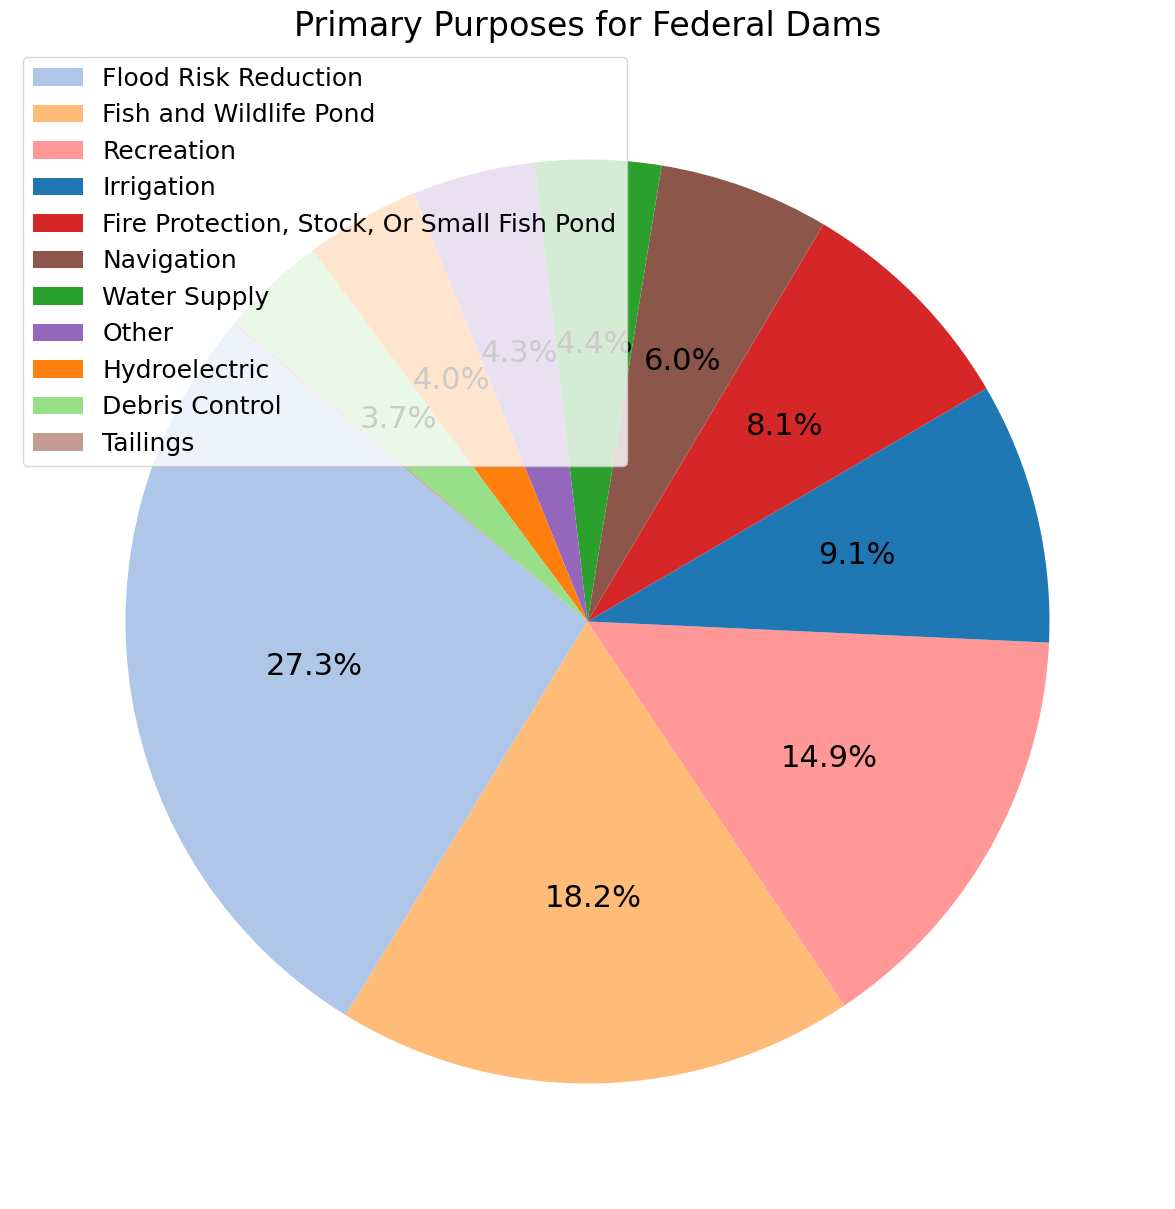

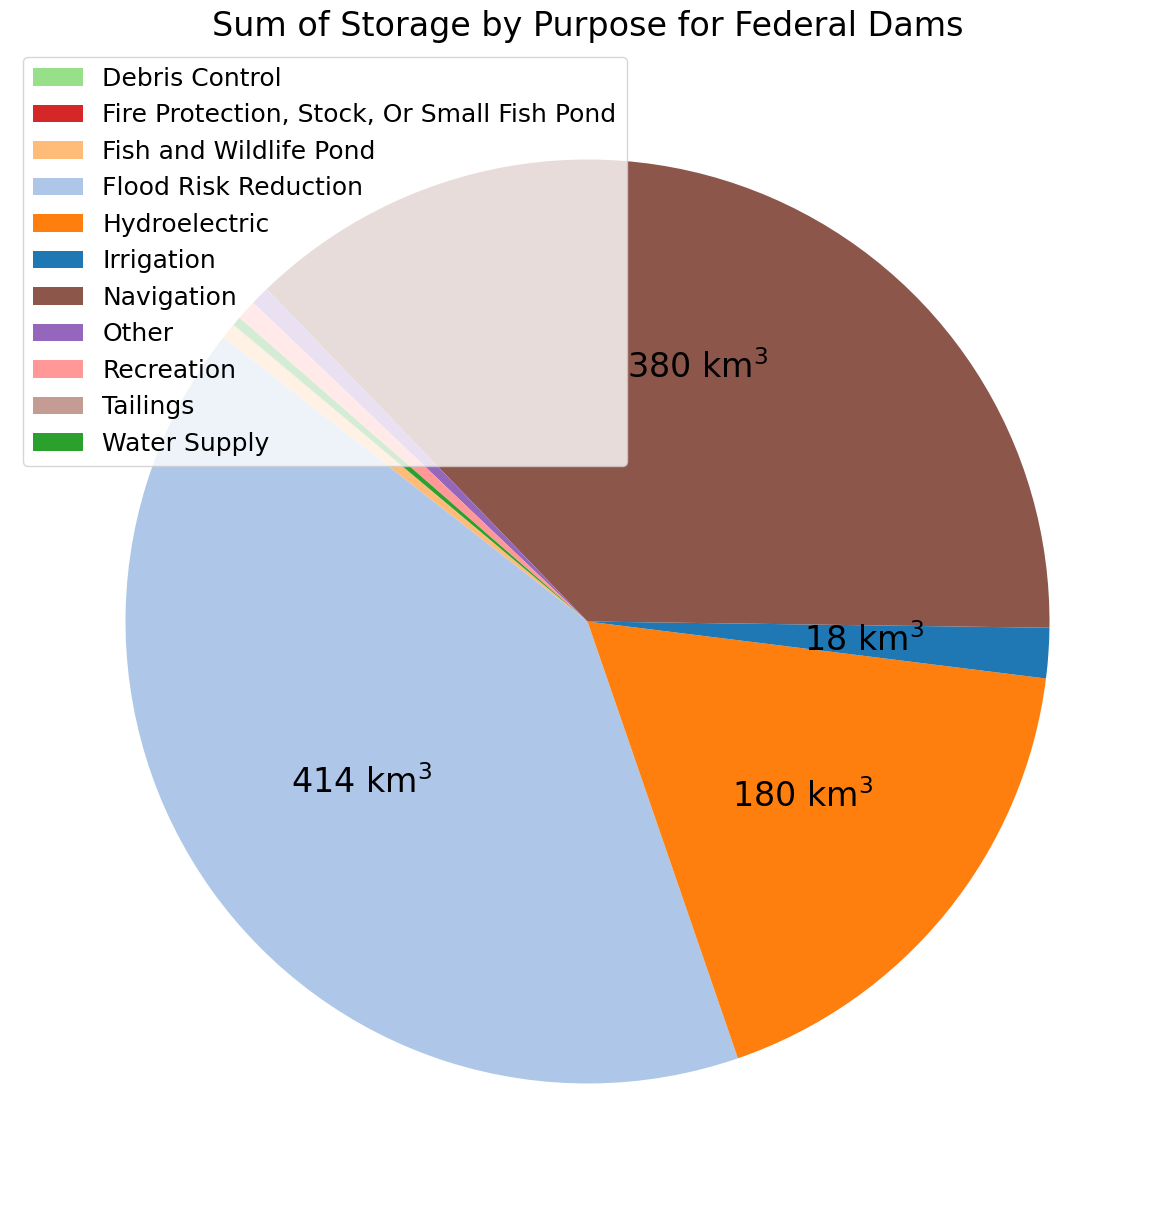

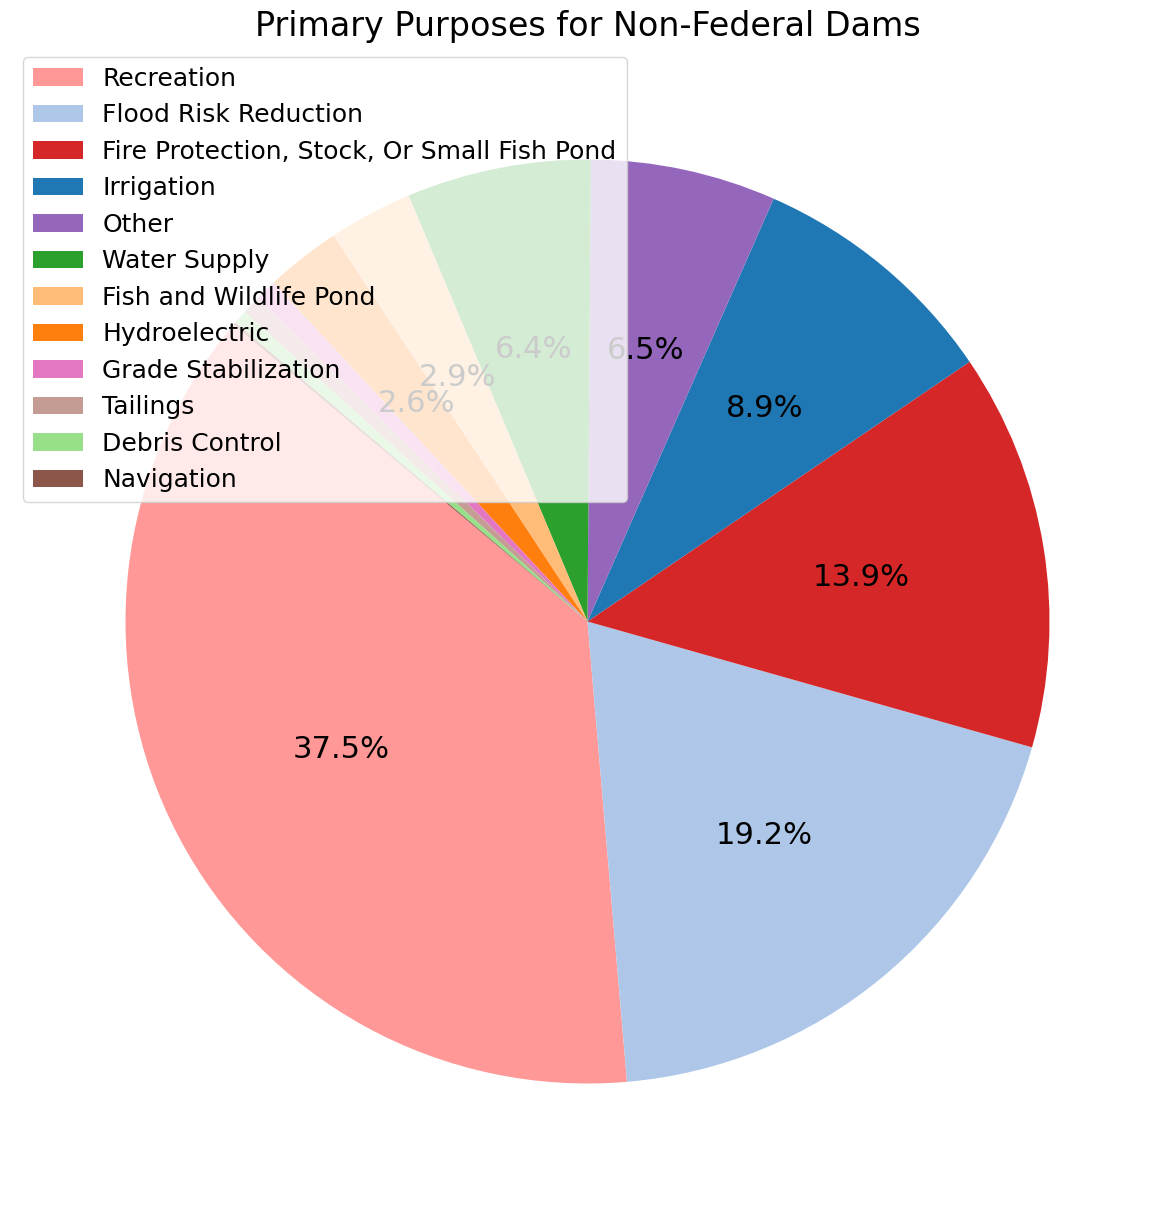

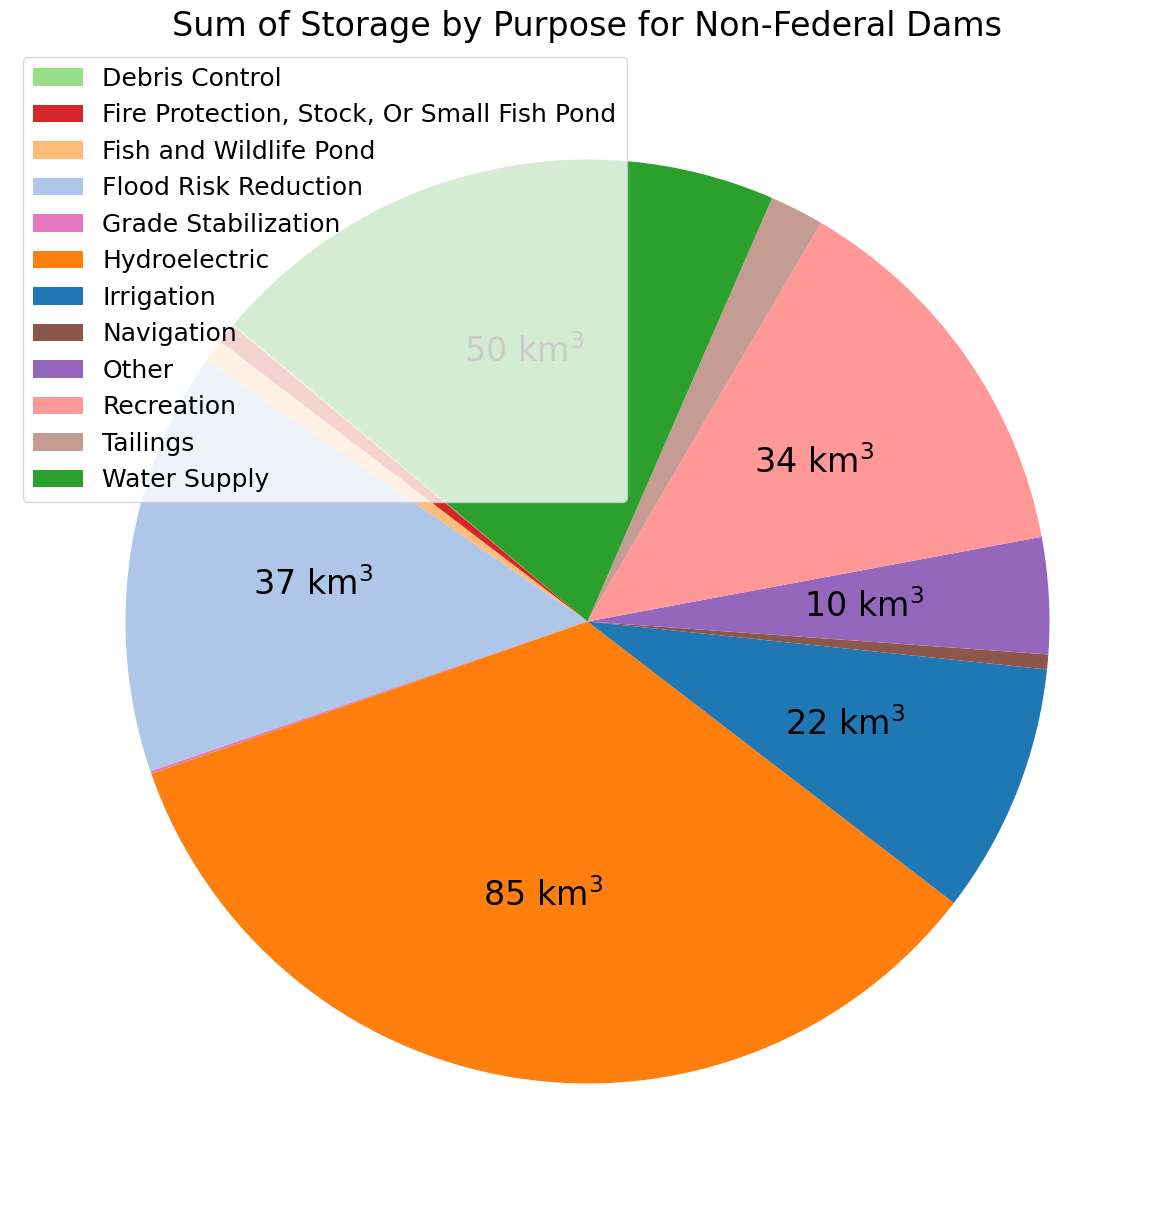

In [31]:
#usage federal vs non federal

# Get unique purposes and create a consistent color mapping
all_purposes = pd.concat([federal_dams['PrimaryPur'], nonfederal_dams['PrimaryPur']]).unique()
colors = plt.get_cmap('tab20').colors  # Use a colormap with more colors

# Create a dictionary mapping purposes to colors
color_mapping = {purpose: colors[i % len(colors)] for i, purpose in enumerate(all_purposes)}


# Define a threshold for displaying percentages
threshold = 2.0  # For example, show percentages only if they are 5% or more

# Custom autopct function
def custom_autopct(pct):
    if pct < threshold:
        return ''  # Hide the percentage
    else:
        return f'{pct:.1f}%'



federal_counts = federal_dams['PrimaryPur'].value_counts()
fig,ax = plt.subplots(figsize=(15,15))
# ax.pie(federal_counts, labels=federal_counts.index,autopct=lambda pct: custom_autopct(pct), startangle=140,colors=[color_mapping[p] for p in federal_counts.index])

# wedges, texts, autotexts = ax.pie(
#     federal_counts,
#     labels=federal_counts.index,
#     autopct=lambda pct: custom_autopct(pct),
#     startangle=140,
#     colors=[color_mapping[p] for p in federal_counts.index],
#     textprops={'fontsize': 16},  # Font size for labels
# )

wedges, texts, autotexts = ax.pie(
    federal_counts,
    autopct=lambda pct: custom_autopct(pct),
    startangle=140,
    colors=[color_mapping[p] for p in federal_counts.index],
    textprops={'fontsize': 16},  # Font size for labels
)


# Set font size for the percentage text
for autotext in autotexts:
    autotext.set_fontsize(22)

# Add title
ax.set_title('Primary Purposes for Federal Dams', fontsize = 24)

plt.legend(federal_counts.index, loc="upper left",fontsize=18)


plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\federalUsagelegend.png",bbox_inches='tight')
plt.show()

# Group by 'PrimaryPur' and sum 'MaxStor_m3' for each group
purpose_storage = federal_dams.groupby('PrimaryPur')['MaxStor_m3'].sum()

# Create a label for each purpose
# labels = purpose_storage.index


# def custom_label(storage_sums):
#     def inner_autopct(pct):
#         total_storage = int(storage_sums[int(pct/100 * len(storage_sums))]*1e-9)  # Convert percentage to actual sum
#         return f'{total_storage:,.2f} km$^3$'
#     return inner_autopct


def custom_label(storage_sums):
    total_sum = sum(storage_sums)  # Get the total sum of all storage values
    def inner_autopct(pct):
        # Calculate the actual storage for this slice based on the percentage
        wedge_storage = pct * total_sum / 100.0
        wedge_storage_km3 = wedge_storage * 1e-9  # Convert to km³
        # Only display the label if the storage is greater than or equal to 10 km³
        if wedge_storage_km3 >= 10:
            return f'{wedge_storage_km3:,.0f} km$^3$'
        else:
            return ''  # No label for wedges smaller than 10 km³
    return inner_autopct

# Plot pie chart based on the sum of MaxStor_m3 for each purpose
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autotexts = ax.pie(
    purpose_storage, 
#     labels=purpose_storage.index, 
    autopct = custom_label(purpose_storage),  # You can customize or remove this
    colors=[color_mapping[p] for p in purpose_storage.index],
    startangle=140,
    textprops={'fontsize': 16},  # Set font size for labels
   
)


# Set title
ax.set_title('Sum of Storage by Purpose for Federal Dams',fontsize=24)

# Set font size for the percentage text
for autotext in autotexts:
    autotext.set_fontsize(24)

fix_labels(labels,sepfactor=0.85)


plt.legend(purpose_storage.index, loc="upper left",fontsize=18)

plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\federalUsageCaplegend.png",bbox_inches='tight')

# Show the plot
plt.show()


#usage federal vs non federal
nonfederal_counts = nonfederal_dams['PrimaryPur'].value_counts()
fig,ax = plt.subplots(figsize=(15,15))
# ax.pie(nonfederal_counts, labels=nonfederal_counts.index, autopct=lambda pct: custom_autopct(pct), startangle=140,colors=[color_mapping[p] for p in nonfederal_counts.index])

wedges, labels, autotexts = ax.pie(
    nonfederal_counts,
#     labels=nonfederal_counts.index,
    autopct=lambda pct: custom_autopct(pct),
    startangle=140,
    colors=[color_mapping[p] for p in nonfederal_counts.index],
    textprops={'fontsize': 16},  # Font size for labels
)

# Set font size for the percentage text
for autotext in autotexts:
    autotext.set_fontsize(22)


def fix_labels(mylabels, tooclose=0.1, sepfactor=2):
    vecs = np.zeros((len(mylabels), len(mylabels), 2))
    dists = np.zeros((len(mylabels), len(mylabels)))
    for i in range(0, len(mylabels)-1):
        for j in range(i+1, len(mylabels)):
            a = np.array(mylabels[i].get_position())
            b = np.array(mylabels[j].get_position())
            dists[i,j] = np.linalg.norm(a-b)
            vecs[i,j,:] = a-b
            if dists[i,j] < tooclose:
                mylabels[i].set_x(a[0] + sepfactor*vecs[i,j,0])
                mylabels[i].set_y(a[1] + sepfactor*vecs[i,j,1])
                mylabels[j].set_x(b[0] - sepfactor*vecs[i,j,0])
                mylabels[j].set_y(b[1] - sepfactor*vecs[i,j,1])


fix_labels(labels,sepfactor=0.95)

# Add title
ax.set_title('Primary Purposes for Non-Federal Dams',fontsize=24)

plt.legend(nonfederal_counts.index, loc="upper left",fontsize=18)


plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\nonfederalUsagelegend.png",bbox_inches='tight')
plt.show()


# Group by 'PrimaryPur' and sum 'MaxStor_m3' for each group
purpose_storage = nonfederal_dams.groupby('PrimaryPur')['MaxStor_m3'].sum()

# Create a label for each purpose
# labels = purpose_storage.index


# Plot pie chart based on the sum of MaxStor_m3 for each purpose
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autotexts = ax.pie(
    purpose_storage, 
#     labels=purpose_storage.index, 
    autopct = custom_label(purpose_storage),  # You can customize or remove this
    startangle=140,
    colors=[color_mapping[p] for p in purpose_storage.index],
    textprops={'fontsize': 16},  # Set font size for labels
    
)

# Set title
ax.set_title('Sum of Storage by Purpose for Non-Federal Dams',fontsize=24)

# Set font size for the percentage text
for autotext in autotexts:
    autotext.set_fontsize(24)

fix_labels(labels,sepfactor=0.85)

plt.legend(purpose_storage.index, loc="upper left",fontsize=18)



plt.savefig(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Figures\nonfederalUsageCaplegend.png",bbox_inches='tight')

# Show the plot
plt.show()


In [44]:
#number hydropower per state
hydroelectric_dams = damnet[damnet['PrimaryPur']=='Hydroelectric']
dams_per_state = hydroelectric_dams.groupby('State').size().reset_index(name='Count')

dams_per_state.to_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\FigureFiles\hydroelectric_by_state.csv")

In [45]:
print(dams_per_state)

             State  Count
0          Alabama     16
1          Arizona      8
2         Arkansas      7
3       California    163
4         Colorado     30
5      Connecticut     24
6          Florida      1
7          Georgia     35
8            Idaho     26
9         Illinois      6
10         Indiana      3
11            Iowa      8
12        Kentucky      2
13       Louisiana      1
14           Maine    181
15        Maryland      4
16   Massachusetts     41
17        Michigan     82
18       Minnesota     32
19        Missouri      5
20         Montana     19
21        Nebraska     23
22          Nevada      1
23   New Hampshire     81
24      New Jersey      4
25        New York    186
26  North Carolina     64
27    North Dakota      1
28            Ohio      3
29        Oklahoma      3
30          Oregon     36
31    Pennsylvania     13
32    Rhode Island      6
33  South Carolina     31
34       Tennessee      8
35           Texas     17
36            Utah      5
37         V

In [46]:
print('Internal Drainage:',len(damnet.loc[damnet.countryOut == 0]))
print('Gulf of Mexico:',len(damnet.loc[damnet.countryOut == 5]))
print('Great Lakes:',len(damnet.loc[damnet.countryOut == 2]))
print('Atlantic:',len(damnet.loc[(damnet.countryOut == 11)|(damnet.countryOut == 31)|(damnet.countryOut == 41)]))
print('Pacific:',len(damnet.loc[(damnet.countryOut == 12)|(damnet.countryOut == 32)|(damnet.countryOut == 42)]))
print('No terminal flowpath:',len(damnet.loc[damnet.countryOut == -999]))

Internal Drainage: 909
Gulf of Mexico: 38216
Great Lakes: 1519
Atlantic: 13643
Pacific: 3167
No terminal flowpath: 0


In [47]:
gulf = damnet[damnet['countryOut'] == 5]
GL = damnet[damnet['countryOut'] == 2]
internal = damnet[damnet['countryOut'] == 0]
atlantic = damnet[(damnet['countryOut'] == 11)|(damnet.countryOut == 31)|(damnet.countryOut == 41)]
pacific = damnet[(damnet.countryOut == 12)|(damnet.countryOut == 32)|(damnet.countryOut == 42)]

print('Internal Drainage storage:', internal['MaxStor_m3'].sum())
print('Gulf of Mexico storage:', gulf['MaxStor_m3'].sum())
print('Great Lakes storage:', GL['MaxStor_m3'].sum())
print('Atlantic storage:', atlantic['MaxStor_m3'].sum())
print('Pacific storage:',  pacific['MaxStor_m3'].sum())


Internal Drainage storage: 16517930575.366901
Gulf of Mexico storage: 553506176415.8177
Great Lakes storage: 352926181330.3813
Atlantic storage: 121223338062.34212
Pacific storage: 242517568223.219


In [12]:
atlanticCA = damnet[(damnet['countryOut'] == 11)]
atlanticUSA = damnet[(damnet.countryOut == 41)]
atlanticMX = damnet[(damnet.countryOut == 31)]

pacificCA = damnet[(damnet.countryOut == 12)]
pacificUSA = damnet[(damnet.countryOut == 42)]
pacificMX = damnet[(damnet.countryOut == 32)]

print('Atlantic CA storage:', atlanticCA['MaxStor_m3'].sum())
print('Atlantic MX storage:', atlanticMX['MaxStor_m3'].sum())
print('Atlantic USA storage:', atlanticUSA['MaxStor_m3'].sum())

print('Pacific CA storage:',  pacificCA['MaxStor_m3'].sum())
print('Pacific MX storage:',  pacificMX['MaxStor_m3'].sum())
print('Pacific USA storage:',  pacificUSA['MaxStor_m3'].sum())

Atlantic CA storage: 16569932934.584919
Atlantic MX storage: 1801867.584
Atlantic USA storage: 104656157515.03041
Pacific CA storage: 0.0
Pacific MX storage: 110314325240.64058
Pacific USA storage: 132203249149.9784


In [152]:
test = pd.read_csv(r"T:\Jobs\DO\_NonFeature\WaterSMART\2020-PRG-ReservoirSedimentationEquations\CALC\Abby_MLRpredictions\9_19_24\cap_m_9_19_24v2p9.csv")

In [9]:
len(damnet)

57453

In [56]:
spatialedits = pd.read_csv('E:/ResSed/MediumResolution_DamLinkages/Manuscript/FinalInputFiles/NID_spatialEdits.csv')
check = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Melissa\CheckNABD.csv")
# check = check[check.DamNetCorrect == 0]

In [57]:
merge = pd.merge(check,spatialedits,how='left',left_on='NID',right_on='NID_ID', indicator = True)

In [58]:
merge.loc[merge['_merge']=='both']

,Field1,COMMENT,NIDID,COMID_x,UNIQUE_STR,newX,newY,Dam_name,DivDASqKM_x,Dam_name_1,ShortID,NID,IsSite,IsUSBR,IsUSACE,IsGRanD,NrX_Final,NrY_Final,COMID_y,DivDASqKM_y,DamNetCorrect,NABDCorrect,MoveX,MoveY,ToDelete,NID_ID,Moved,Deleted,lat,long,_merge
35,28094,1,NY11990,8100061,33643,-75.978035,42.110836,NEW YORK STATE ELECTRIC & GAS CORPORATION DAM,10117.8342,New York State Electric & Gas Corporation Dam,332741,NY11990,0,0,0,0,-75.987292,42.113268,8106367,1.2915,0,0,NaN,NaN,1.0,NY11990,1.0,0.0,42.113268,-75.987292,both


In [59]:
check.loc[check.ToDelete == 1]

,Field1,COMMENT,NIDID,COMID_x,UNIQUE_STR,newX,newY,Dam_name,DivDASqKM_x,Dam_name_1,ShortID,NID,IsSite,IsUSBR,IsUSACE,IsGRanD,NrX_Final,NrY_Final,COMID_y,DivDASqKM_y,DamNetCorrect,NABDCorrect,MoveX,MoveY,ToDelete
35,28094,1,NY11990,8100061,33643,-75.978035,42.110836,NEW YORK STATE ELECTRIC & GAS CORPORATION DAM,10117.8342,New York State Electric & Gas Corporation Dam,332741,NY11990,0,0,0,0,-75.987292,42.113268,8106367,1.2915,0,0,NaN,NaN,1.0
36,31633,1,OR00258,24192774,37654,-116.835597,44.970346,Oxbow,153571.5054,Oxbow,339448,OR00258,0,0,0,0,-116.834784,44.971111,24194744,2.0538,0,0,NaN,NaN,1.0
42,40922,4,WA00118,23736269,49782,-122.403693,45.600533,"Lacamas & Round Lakes, Upper Dam",159.0930,Lacamas & Round Lakes Upper Dam,358727,WA00118,0,0,0,0,-122.404050,45.600919,23737889,1.1601,0,0,NaN,NaN,1.0
50,981,1,AL02105,18210230,1085,-87.582093,32.561744,DR ROBERT LAMB #2,1.3896,Dr Robert Lamb #2,276696,AL02105,0,0,0,0,-87.567231,32.554880,18210210,157.4820,0,0,NaN,NaN,1.0
59,7526,1,IA00521,13377351,8993,-91.013697,42.177031,THOMAS DAM,3.2796,Thomas Dam,289463,IA00521,0,0,0,0,-90.894626,42.166724,13374233,1937.3985,0,0,NaN,NaN,1.0
62,8904,6,IA03344,5124436,10623,-93.113185,40.799240,MC MURRAY WETLAND DAM,1.0647,Mc Murray Wetland Dam,292120,IA03344,0,0,0,0,-93.124339,40.792798,5123846,471.9006,0,0,NaN,NaN,1.0
72,12414,8,KS04132,3644554,15122,-96.029725,39.249958,NaN,0.0000,Ksnoname 4132,299900,KS04132,0,0,0,0,-96.021328,39.263784,3642782,1.7514,0,0,NaN,NaN,1.0
80,26005,1,NH00606,19335017,31062,-71.190234,44.441368,CASCADE WASTE WATER LAGOON,7.3656,Cascade Wastewater Lagoon Dam,329595,NH00606,0,0,0,0,-71.186123,44.442437,19335237,3525.4368,0,0,NaN,NaN,1.0
85,30934,1,OK21261,575912,36803,-98.579242,34.313717,WHITES,7.1901,Whites,338171,OK21261,0,0,0,0,-98.525373,34.270588,575974,1283.4963,0,2,NaN,NaN,1.0
89,33631,1,SC00679,9734070,39945,-80.898305,34.830241,SCNONAME 46020,7.1280,New-Indy Dam 1,342265,SC00679,0,0,0,0,-80.884813,34.832457,9736382,9160.6635,0,0,NaN,NaN,1.0


In [34]:
len(damnet.loc[damnet.IsRiverMth==1])

143

In [33]:
damnet = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov07\NIDsMappedInBasins_MedRes_110724.csv")

In [37]:
damnet.loc[damnet.ShortID <0]

,Dam_Name,ShortID,NID,GRAND_ID,IsSite,IsUSBR,IsUSACE,IsGRanD,State,OwnerTypes,PrimaryPur,PrimDamTyp,Reservoir,IsRiverMth,delta,IsLock,yrc,yrr,yrc_source,OCapm3_Rem,Batch_for,NIDStor_m3,GRanDCapm3,MaxStor_m3,StorSource,Dam_Len_m,SA_m2,DA_km2,MaxQ_m3s,DamH_m,NrX_Final,NrY_Final,COMID,LENGTHKM,Hydroseq,Pathlength,DivDASqKM,SLOPE,QA_MA,VA_MA,QC_MA,VC_MA,QE_MA,VE_MA,WBCOMID,D50_mm_,FromDam,ToDam,flag,flagDA,flagTerm,flagHW,countryOut,SiteTag,GRanDTag,RiverTag,DeltaTag
2,SacramentoRiver,-1,MOUTH_SacR,NaN,1,0,0,0,NaN,NaN,NaN,NaN,SacramentoRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-121.793539,38.062953,15048261,2.322,10002293,0.000,66999.6423,0.000103,1166.174569,-3047.695200,1506.131033,-3047.695200,833.189304,-3047.695200,120049838,0.710036,[288955 289838 289932 289630 289107 289608 289...,NaN,[10 1],0,1,0,42,0,0,0,0
3,SanJoaquinRiver,-2,MOUTH_SJR,NaN,1,0,0,0,NaN,NaN,NaN,NaN,SanJoaquinRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-121.759993,38.027262,1889834,2.471,10002310,12.596,41955.6159,0.000010,400.563421,-3047.695200,463.921525,-3047.695200,221.291205,-3047.695200,120049839,0.821846,[289303 288782 289764 288769 289822 288896 289...,NaN,[10 1],0,1,0,42,0,0,0,0
4,KlamathRiver,-31,MOUTH_Klamath,NaN,1,0,0,0,NaN,NaN,NaN,NaN,KlamathRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-124.079752,41.546141,4438382,0.644,10003026,0.000,34774.0911,0.000078,707.585579,-3047.695200,868.462551,-3047.695200,531.006205,-3047.695200,120049323,3.187478,[289941 289867 289829 289638 126948 36971 2895...,NaN,[10 1],0,1,0,42,0,0,0,0
8,EelRiver,-143,MOUTH_Eel,NaN,1,0,0,0,NaN,NaN,NaN,NaN,EelRiver,1,24,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-124.159478,40.558964,2702627,4.515,10003665,16.956,9292.3614,0.000202,325.611882,-3047.695200,369.231448,-3047.695200,281.710251,-3047.695200,8317371,6.630242,[289641 289910 289434 289116 289431 289347 289...,NaN,[10 1],0,1,0,42,0,0,0,0
239,KeysCreek,-152,MOUTH_KeysCreek,NaN,1,0,0,0,NaN,NaN,NaN,NaN,KeysCreek,1,35,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-122.922582,38.221520,5329303,1.195,10022949,0.000,193.9473,0.002167,3.487610,-3047.695200,2.490123,-3047.695200,2.843177,-3047.695200,0,4.876607,289611,NaN,[10 1],0,1,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55811,GreenRiver,-13,MOUTH_GreenUT,NaN,1,0,0,0,NaN,NaN,NaN,NaN,GreenRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-109.887289,38.190194,4932636,4.697,760000231,1442.580,114300.6489,0.001160,329.130216,1.077697,356.334307,1.084046,174.579500,1.028450,120049819,0.487087,[291535 290722 291323 290629 291234 290628 290...,807.0,0,0,0,0,32,807,807,-11,23
55813,SanJuanRiver,-101,MOUTH_SanJuan,NaN,1,0,0,0,NaN,NaN,NaN,NaN,SanJuanRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-110.907118,37.177130,1384376,0.633,760000974,1227.687,63405.4455,0.000010,116.563898,-3047.390400,123.868613,-3047.390400,65.614613,-3047.390400,3528295,0.245208,[364975 364862 340842 291530 290764 290772 390...,807.0,0,0,0,0,32,807,807,-11,23
55815,UpperColoradoRiver,-100,MOUTH_UpperColorado,NaN,1,0,0,0,NaN,NaN,NaN,NaN,UpperColoradoRiver,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-109.885584,38.190795,3380891,1.382,760001234,1442.580,67805.0136,0.005658,332.185429,1.265828,359.701713,1.273406,213.348484,1.224546,120049820,0.785774,[290898 365145 364852 290070 291485 290658 291...,807.0,0,0,0,0,32,807,807,-11,23
57032,RedRiveroftheNorth,-122,MOUTH_RedRiveroftheNorth,NaN,1,0,0,0,NaN,NaN,NaN,NaN,RedRiveroftheNorth,1,0,0,1700,0,Rivers,0,Rivers,0.0,0,0.0,GDAT,0.0,0.0,0.0,0.0,0.0,-97.230387,48.999993,7077392,0.920,840000015,0.000,89498.5056,0.000543,85.184835,0.847594,92.630964,0.852727,144.377141,0.880497,120049059,0.323125,

In [67]:
##combine rivertags field for gis figure

import ast

MLR = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov7\NIDsMappedInBasins_MedRes_110724MLR.csv")

riverfile = pd.merge(damnet,MLR[['NID','rivertags']],on='NID',how='left',indicator=True)

# Preprocess the 'rivertags' field to replace spaces with commas
# riverfile['rivertags'] = riverfile['rivertags'].str.replace(" ", ",").apply(ast.literal_eval)

riverfile['PlotRiver'] = np.full(len(riverfile['ShortID']),np.nan)


# Convert 'rivertags' entries to lists, handling NaN values
def convert_to_list(value):
    if pd.isna(value):  # Check if the entry is NaN
        return np.nan
    # Replace spaces with commas for conversion, then evaluate as a list
    return ast.literal_eval(value.replace(" ", ","))

# Apply the conversion function to create lists
riverfile['rivertags'] = riverfile['rivertags'].apply(convert_to_list)





C:\Users\ahurst\AppData\Local\Temp\1\ipykernel_16788\1864310698.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  MLR = pd.read_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov7\NIDsMappedInBasins_MedRes_110724MLR.csv")


In [72]:
river = -5
# Apply the function to check for `river` in each list, assigning 5 if present, otherwise 0
# Update PlotRiver only where `river` is found in the rivertags_list
riverfile['PlotRiver'] = riverfile.apply(
    lambda row: river if isinstance(row['rivertags'], list) and river in row['rivertags'] else row['PlotRiver'], 
    axis=1
)

In [75]:
riverfile.to_csv(r"E:\ResSed\MediumResolution_DamLinkages\Manuscript\Outputs_Nov7\NIDsMappedInBasins_MedRes_110724MLR.csv")

In [74]:
riverfile.head()
riverfile = riverfile[['ShortID','NID','rivertags','PlotRiver','NrX_Final','NrY_Final']]